In [0]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import numpy as np
import pandas as pd


In [0]:
def split_sequence(sequence, n_steps):
  X=[]
  y=[]
  for i in range(len(sequence)):
		# find the end of this pattern
    end_ix = i + n_steps
		# check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
		# gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  array_X = np.array(X)
  array_y = np.array(y)
  return array_X, array_y

In [0]:
df = pd.read_csv("totalcases.csv")

In [0]:
df = df.loc[df['Entity'] == 'Italy']

In [0]:
data = df['Total confirmed cases of COVID-19 (cases)']

In [0]:
list_ = data.tolist()
list_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 17,
 79,
 132,
 229,
 322,
 400,
 650,
 888,
 1128,
 1689,
 2036,
 2502,
 3089,
 3858,
 4636,
 5883,
 7375,
 9172,
 10149,
 12462,
 15113,
 17660,
 21157,
 23980,
 27980,
 31506,
 35713,
 41035,
 47021,
 53578,
 59138,
 63927,
 69176,
 74386,
 80539,
 86498,
 92472,
 97689,
 101739,
 105792,
 110574,
 115242,
 119827,
 124632,
 128948,
 132547,
 135586,
 139422,
 143626,
 147577,
 152271,
 156363,
 159516,
 162488,
 165155]

In [0]:
while 0 in list_:
  list_.remove(0)
while 3 in list_:
  list_.remove(3)
list_.insert(0,3)
list_.insert(0,3)


In [0]:
array_ = np.array(list_)
print(type(array_))
array_
np.size(array_)
index = [50,51,52,53,54,55,56]
array_ = np.delete(array_,index)
array_

<class 'numpy.ndarray'>


array([     3,      3,     17,     79,    132,    229,    322,    400,
          650,    888,   1128,   1689,   2036,   2502,   3089,   3858,
         4636,   5883,   7375,   9172,  10149,  12462,  15113,  17660,
        21157,  23980,  27980,  31506,  35713,  41035,  47021,  53578,
        59138,  63927,  69176,  74386,  80539,  86498,  92472,  97689,
       101739, 105792, 110574, 115242, 119827, 124632, 128948, 132547,
       135586, 139422])

In [0]:
n_steps = 3
# split into samples
X, y = split_sequence(array_, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [0]:
x_input = np.array([156363,
 159516,
 162488,])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[177099.6]]


In [0]:
array_forecast = np.array([150570,154464,158902,163609,168310,173060,177099])

In [0]:
array_true = np.array([ 143626,
 147577,
 152271,
 156363,
 159516,
 162488,
 165155])

In [0]:
array_diff = array_1-array_2

In [0]:
list_1 = []
for i in range(len(array_diff)):
  list_1.insert(i,np.mean(np.abs(array_diff[i]/array_true[i])) * 100) 

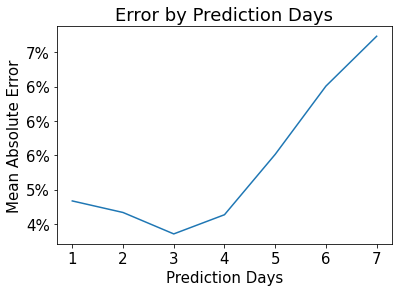

In [0]:
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter


x = range(1,8)
plt.plot(x,list_1)
plt.title('Error by Prediction Days')
plt.xlabel('Prediction Days')
plt.ylabel('Mean Absolute Error');

plt.rcParams.update({'font.size': 15})
def to_percent(temp, position):
    return '%1.0f'%temp + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
x = range(8)
plt.show()